<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Market_Risk_Assessment_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-7e599c9eebdf>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2015-01-01', end='2024-01-01', freq='M')


Summary Statistics:
        interest_rate  inflation_rate  forex_rate
count     108.000000      108.000000  108.000000
mean        4.018786        2.838056   72.922809
std         0.790105        0.586934    2.131972
min         2.303360        1.454369   68.269118
25%         3.363128        2.410195   71.286262
50%         4.074356        2.832118   72.645108
75%         4.619126        3.268211   74.844649
max         6.063093        4.670819   77.442387


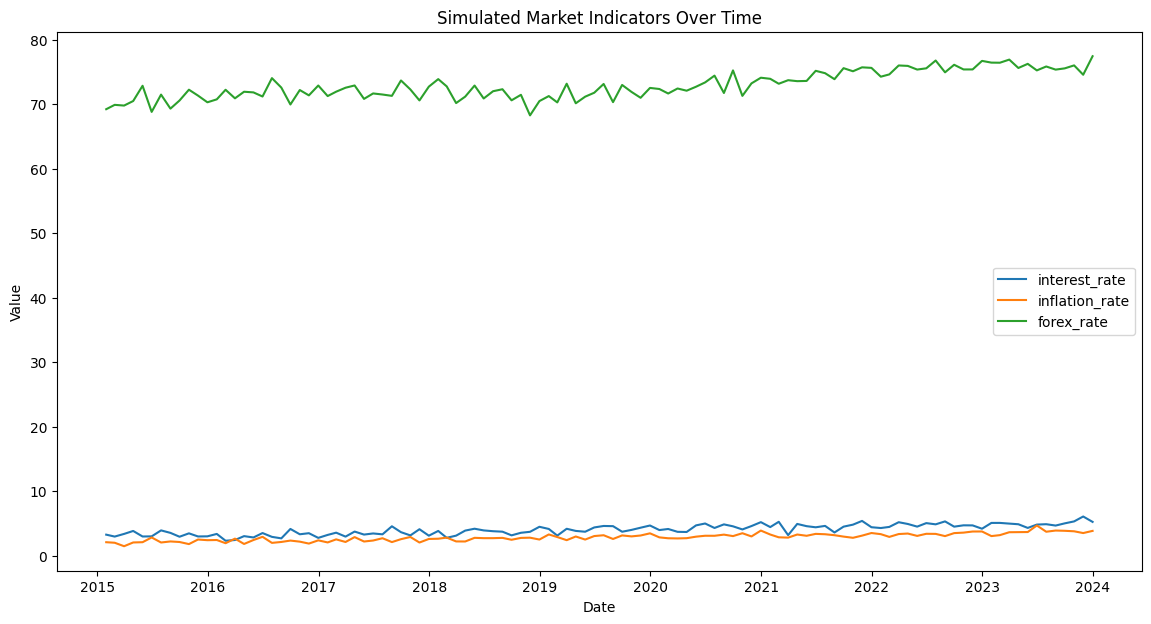

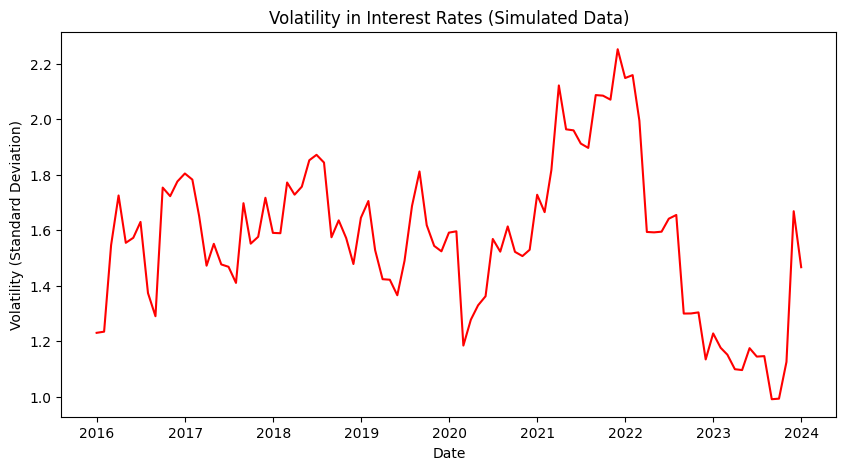

Interest Rate & Inflation Correlation: 0.70
Interest Rate & Forex Rate Correlation: 0.64
Inflation Rate & Forex Rate Correlation: 0.69


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


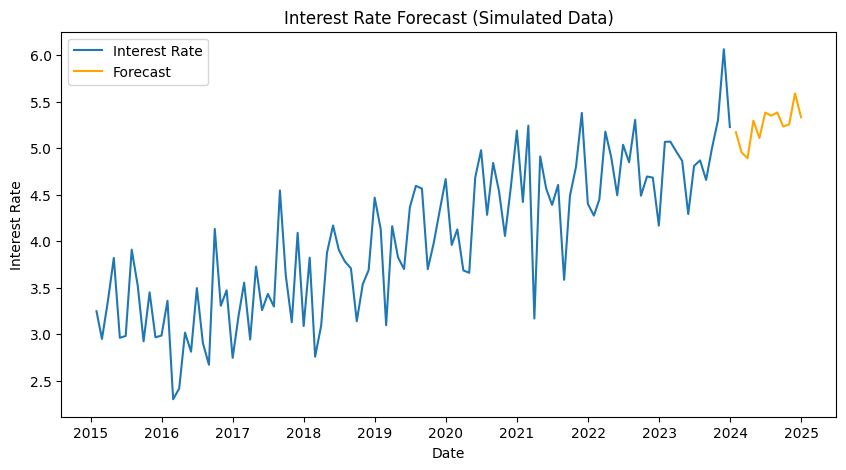

Recommendation: Consider hedging strategies as interest rates are projected to rise.


In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.stats import pearsonr

# Step 1: Simulate Market Data
np.random.seed(42)  # For reproducibility
date_range = pd.date_range(start='2015-01-01', end='2024-01-01', freq='M')
n = len(date_range)

# Simulating data for interest rates, inflation rates, and forex rates
# We'll add a bit of trend and seasonality to make it more realistic
interest_rate = np.abs(3 + 0.02 * np.arange(n) + np.random.normal(scale=0.5, size=n))  # Base rate with slight upward trend
inflation_rate = np.abs(2 + 0.015 * np.arange(n) + np.random.normal(scale=0.3, size=n))  # Base rate with slight upward trend
forex_rate = 70 + 0.05 * np.arange(n) + np.sin(np.linspace(0, 3*np.pi, n)) + np.random.normal(scale=1, size=n)

# Creating DataFrame
data = pd.DataFrame({'date': date_range, 'interest_rate': interest_rate, 'inflation_rate': inflation_rate, 'forex_rate': forex_rate})
data.set_index('date', inplace=True)

# Step 2: Descriptive Analysis of Market Indicators
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# Visualize interest rates, inflation, and forex rates over time
plt.figure(figsize=(14, 7))
for col in ['interest_rate', 'inflation_rate', 'forex_rate']:
    plt.plot(data.index, data[col], label=col)
plt.title("Simulated Market Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 3: Volatility Analysis
# Calculate rolling standard deviation to assess volatility
window_size = 12  # 12 months for annualized volatility
data['volatility'] = data['interest_rate'].rolling(window=window_size).std() * np.sqrt(window_size)

plt.figure(figsize=(10, 5))
plt.plot(data['volatility'], color='red')
plt.title("Volatility in Interest Rates (Simulated Data)")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.show()

# Step 4: Risk Factor Correlation Analysis
# Pearson correlation to analyze relationships between factors
corr_interest_inflation = pearsonr(data['interest_rate'], data['inflation_rate'])
corr_interest_forex = pearsonr(data['interest_rate'], data['forex_rate'])
corr_inflation_forex = pearsonr(data['inflation_rate'], data['forex_rate'])

print(f"Interest Rate & Inflation Correlation: {corr_interest_inflation[0]:.2f}")
print(f"Interest Rate & Forex Rate Correlation: {corr_interest_forex[0]:.2f}")
print(f"Inflation Rate & Forex Rate Correlation: {corr_inflation_forex[0]:.2f}")

# Step 5: Risk Mitigation Insights using Forecasting
# Forecast interest rates using Exponential Smoothing
model = ExponentialSmoothing(data['interest_rate'], trend="add", seasonal="add", seasonal_periods=12)
fit_model = model.fit()
forecast = fit_model.forecast(12)  # Forecasting the next 12 months

plt.figure(figsize=(10, 5))
plt.plot(data['interest_rate'], label='Interest Rate')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Interest Rate Forecast (Simulated Data)")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.legend()
plt.show()

# Step 6: Generate Insights and Recommendations
# Based on forecasted interest rates, you could provide recommendations
if forecast.iloc[-1] > data['interest_rate'].mean():
    print("Recommendation: Consider hedging strategies as interest rates are projected to rise.")
else:
    print("Recommendation: Interest rates are stable; continue monitoring without immediate changes.")
